<a href="https://colab.research.google.com/github/suhyun6363/what_your_personal_color/blob/sibal/sibal_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy matplotlib scikit-learn
!pip install imageio
!pip install numpy matplotlib
!pip install colormath

  Preparing metadata (setup.py) ... done
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39405 sha256=9010b4cf54b2aedc880dc3a228d007ef1b47ff06979b2ec6d01f75462d0cff3a
  Stored in directory: /root/.cache/pip/wheels/ab/b3/4d/c0738759c25a1df01958068f162cf2a9dc3ab1da8b972cfcfc
Successfully built colormath


<ipython-input-8-1ebfed5f3863>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_image = imageio.imread(image_path)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


=============================전체 클러스터 중심값=============================
Cluster 1 Center (RGB): [215.47908632 191.680708   182.17027588]
Cluster 2 Center (RGB): [113.99013807  91.78106509  87.42110454]
Cluster 3 Center (RGB): [237.07530841 217.27748113 214.61793408]
Cluster 4 Center (RGB): [177.21890884 149.56489326 139.71399526]
Cluster 5 Center (RGB): [206.55812373 181.35567641 170.85628824]
Cluster 6 Center (RGB): [223.85077578 200.42774566 193.88720718]
Cluster 7 Center (RGB): [149.39085894 123.1678487  115.26871552]
Cluster 8 Center (RGB): [193.1471536  166.40300752 156.21267454]
Cluster 9 Center (RGB): [79.71374336 62.54138193 62.11465452]
Cluster 10 Center (RGB): [229.97119297 208.37948245 204.59404329]
=============================전체 클러스터 픽셀수=============================
Cluster 10 Size: 18433 pixels
Cluster 6 Size: 13148 pixels
Cluster 1 Size: 10113 pixels
Cluster 3 Size: 16293 pixels
Cluster 5 Size: 7355 pixels
Cluster 8 Size: 4656 pixels
Cluster 4 Size: 2951 pixels
Cluster 7 S

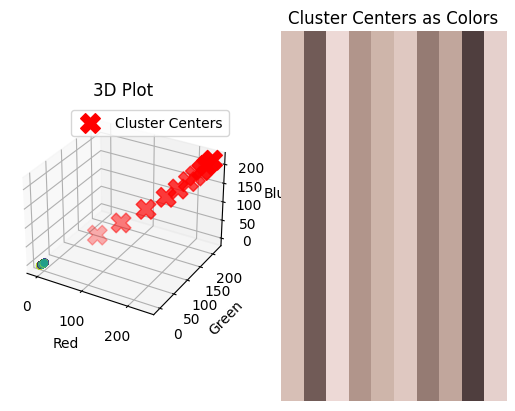

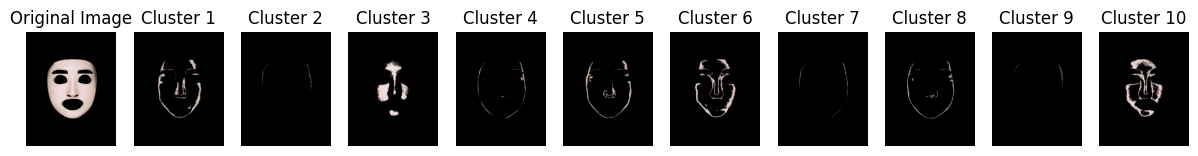

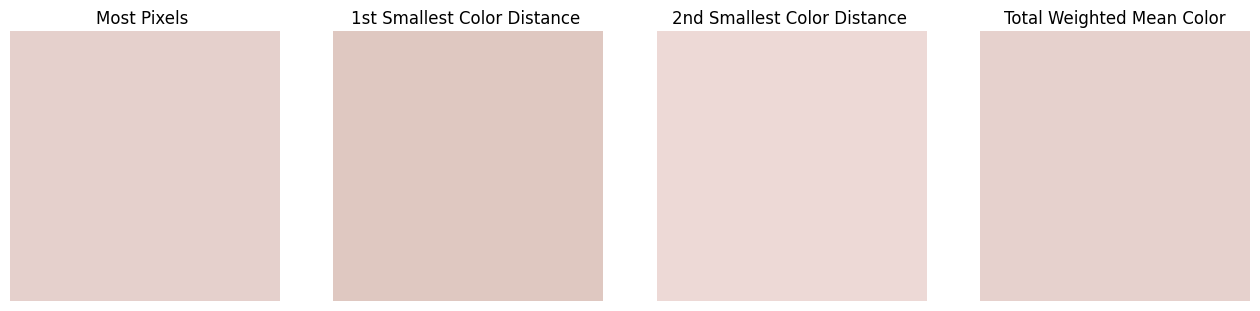

=============================변환=============================
평균 RGB 값: [230.70804612 209.22390024 205.06498308]
Lab: L=85.53578789989778, a=6.762203709834102, b=4.760366694596319
HSV: H=9.731092929826218, S=0.11114940927125128, V=0.9047374357688933
=============================LbS=============================
 L=85.53578789989778, b=4.760366694596319, S=0.11114940927125128


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from collections import Counter
import imageio

from collections import Counter
from colormath.color_objects import sRGBColor, LabColor, HSVColor
from colormath.color_conversions import convert_color

# 이미지 로드
image_path = "/content/facemesh.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = face_image[~np.all(face_image == [0, 0, 0], axis=-1)]

# 이미지를 2D 배열로 변환
face_data = non_black_pixels.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_k = 10
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 중심값(RGB 형식) 출력
cluster_centers_rgb = scaler.inverse_transform(optimal_kmeans.cluster_centers_)

print(f'=============================전체 클러스터 중심값=============================')
for i, center in enumerate(cluster_centers_rgb):
    print(f'Cluster {i + 1} Center (RGB): {center}')

# 각 클러스터에 속하는 픽셀 수 계산
cluster_sizes = Counter(optimal_cluster_labels)

print(f'=============================전체 클러스터 픽셀수=============================')

for i, size in cluster_sizes.items():
    print(f'Cluster {i + 1} Size: {size} pixels')

total_pixels = sum(cluster_sizes.values())

# 출력 전체 픽셀 수
print(f'전체 픽셀 수: {total_pixels}')

# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()

# 3D 플로팅
ax = fig.add_subplot(121, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.scatter(cluster_centers_rgb[:, 0], cluster_centers_rgb[:, 1], cluster_centers_rgb[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
ax.set_title('3D Plot')

# 색상으로 표현
cluster_centers_image = cluster_centers_rgb.reshape((1, optimal_k, 3))
cluster_centers_image = cluster_centers_image.astype(np.uint8)
ax2 = fig.add_subplot(122)
ax2.imshow(cluster_centers_image, aspect='auto')
ax2.axis('off')
ax2.set_title('Cluster Centers as Colors')

# 가장 픽셀 수가 많은 클러스터 찾기
most_pixels_cluster = max(cluster_sizes, key=cluster_sizes.get)

# 첫 번째로 Color distance가 작은 클러스터 찾기
min_distance_1 = float('inf')
selected_cluster_1 = None

for i, center in enumerate(cluster_centers_rgb):
    if i != most_pixels_cluster:  # 가장 픽셀 수가 많은 클러스터는 제외
        current_distance = distance.euclidean(cluster_centers_rgb[most_pixels_cluster], center)
        if current_distance < min_distance_1:
            min_distance_1, selected_cluster_1 = current_distance, i

# 두 번째로 Color distance가 작은 클러스터 찾기
min_distance_2 = float('inf')
selected_cluster_2 = None

for i, center in enumerate(cluster_centers_rgb):
    if i != most_pixels_cluster and i != selected_cluster_1:  # 가장 픽셀 수가 많은 클러스터와 첫 번째로 선택된 클러스터는 제외
        current_distance = distance.euclidean(cluster_centers_rgb[most_pixels_cluster], center)
        if current_distance < min_distance_2:
            min_distance_2, selected_cluster_2 = current_distance, i

# 각 클러스터에 속하는 픽셀의 수를 RGB값에 곱한 뒤, 세 개의 클러스터의 픽셀 수로 나누어 평균 RGB 값을 계산
most_pixels_cluster_size = cluster_sizes[most_pixels_cluster]
selected_cluster_1_size = cluster_sizes[selected_cluster_1]
selected_cluster_2_size = cluster_sizes[selected_cluster_2]

most_pixels_rgb_sum = np.sum(face_data[optimal_cluster_labels == most_pixels_cluster], axis=0)
selected_cluster_1_rgb_sum = np.sum(face_data[optimal_cluster_labels == selected_cluster_1], axis=0)
selected_cluster_2_rgb_sum = np.sum(face_data[optimal_cluster_labels == selected_cluster_2], axis=0)

most_pixels_rgb_mean_weighted = most_pixels_rgb_sum / most_pixels_cluster_size
selected_cluster_1_rgb_mean_weighted = selected_cluster_1_rgb_sum / selected_cluster_1_size
selected_cluster_2_rgb_mean_weighted = selected_cluster_2_rgb_sum / selected_cluster_2_size

total_rgb_sum_weighted = (most_pixels_rgb_sum + selected_cluster_1_rgb_sum + selected_cluster_2_rgb_sum)
total_rgb_mean_weighted = total_rgb_sum_weighted / (most_pixels_cluster_size + selected_cluster_1_size + selected_cluster_2_size)

print(f'=============================Color distance계산=============================')

# 결과 출력
print(f'가장 픽셀 수가 많은 클러스터: {most_pixels_cluster + 1}')
print(f'첫 번째로 Color distance가 작은 클러스터: {selected_cluster_1 + 1}')
print(f'두 번째로 Color distance가 작은 클러스터: {selected_cluster_2 + 1}')
print(f'첫 번째 Color distance: {min_distance_1}')
print(f'두 번째 Color distance: {min_distance_2}')

print(f'=============================가중평균=============================')
print(f'가장 픽셀 수가 많은 클러스터의 가중 평균 RGB 값: {most_pixels_rgb_mean_weighted}')
print(f'첫 번째로 Color distance가 작은 클러스터의 가중 평균 RGB 값: {selected_cluster_1_rgb_mean_weighted}')
print(f'두 번째로 Color distance가 작은 클러스터의 가중 평균 RGB 값: {selected_cluster_2_rgb_mean_weighted}')
print(f'세개의 클러스터의 가중 평균 RGB 값: {total_rgb_mean_weighted}')


# 각 클러스터에 해당하는 이미지 생성 및 출력
fig, axes = plt.subplots(1, optimal_k + 1, figsize=(15, 3))

# 원본 이미지
axes[0].imshow(face_image)
axes[0].axis('off')
axes[0].set_title('Original Image')


for i in range(optimal_k):
    cluster_indices = np.where(optimal_cluster_labels == i)
    cluster_pixels = face_data[cluster_indices]
    cluster_image = np.zeros_like(face_data)
    cluster_image[cluster_indices] = cluster_pixels

    # 이미지 재구성
    cluster_image_reshaped = cluster_image.reshape(non_black_pixels.shape)
    result_image = np.zeros_like(face_image)
    result_image[~np.all(face_image == [0, 0, 0], axis=-1)] = cluster_image_reshaped

    axes[i + 1].imshow(result_image)
    axes[i + 1].axis('off')
    axes[i + 1].set_title(f'Cluster {i + 1}')



# 결과 색상 출력
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(most_pixels_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[0].set_title('Most Pixels ')
ax[0].axis('off')

ax[1].imshow(selected_cluster_1_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[1].set_title('1st Smallest Color Distance ')
ax[1].axis('off')

ax[2].imshow(selected_cluster_2_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[2].set_title('2nd Smallest Color Distance ')
ax[2].axis('off')

ax[3].imshow(total_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[3].set_title('Total Weighted Mean Color')
ax[3].axis('off')

plt.show()


print(f'=============================변환=============================')
# 평균 RGB 값 출력
print(f'평균 RGB 값: {total_rgb_mean_weighted}')

# RGB to Lab conversion
average_srgb = sRGBColor(total_rgb_mean_weighted[0], total_rgb_mean_weighted[1], total_rgb_mean_weighted[2], is_upscaled=True)
average_lab = convert_color(average_srgb, LabColor)

# 출력 Lab 값
print(f'Lab: L={average_lab.lab_l}, a={average_lab.lab_a}, b={average_lab.lab_b}')

# RGB to HSV conversion
average_hsv = convert_color(average_srgb, HSVColor)

# 출력 HSV 값
# s, v값은 비율입니당~
print(f'HSV: H={average_hsv.hsv_h}, S={average_hsv.hsv_s}, V={average_hsv.hsv_v}')

# L, b, S값 출력
print(f'=============================LbS=============================')
print(f' L={average_lab.lab_l}, b={average_lab.lab_b}, S={average_hsv.hsv_s}')



#교수님스미마셍
#출력결과 클러스터순서대로네요



<ipython-input-60-2d32613fef27>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_image = imageio.imread(image_path)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Center (RGB): [220.19263977 196.609908   188.70559094]
Cluster 2 Center (RGB): [131.03282276 106.58205689 100.58497447]
Cluster 3 Center (RGB): [192.07268915 165.17595667 155.0312773 ]
Cluster 4 Center (RGB): [236.62487214 216.65857335 213.89265141]
Cluster 5 Center (RGB): [84.11718276 66.41530055 65.43230115]
Cluster 6 Center (RGB): [171.03863299 143.53380386 133.87035661]
Cluster 7 Center (RGB): [208.98220354 184.20935432 173.81103559]
Cluster 8 Center (RGB): [228.66911626 206.65456002 202.37874505]
Cluster 8 Size: 21228 pixels
Cluster 1 Size: 14133 pixels
Cluster 4 Size: 18575 pixels
Cluster 7 Size: 11179 pixels
Cluster 3 Size: 5706 pixels
Cluster 6 Size: 2709 pixels
Cluster 2 Size: 1370 pixels
Cluster 5 Size: 1648 pixels
전체 픽셀 수: 76548


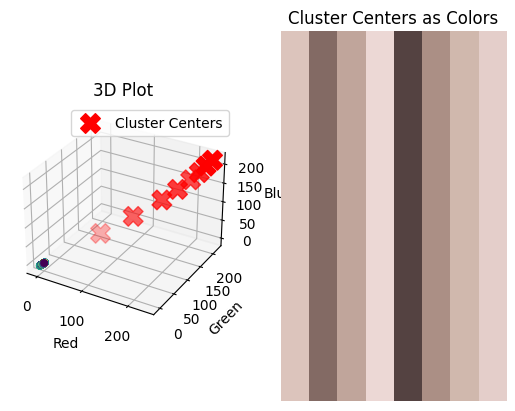

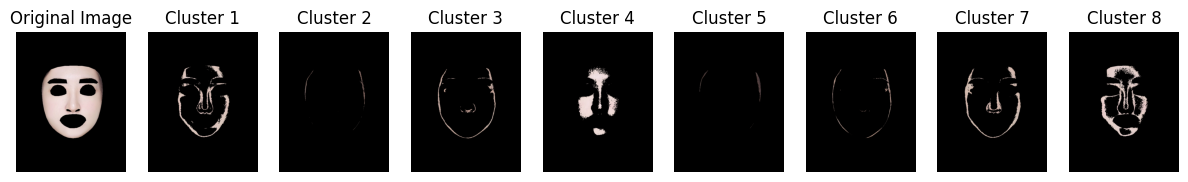

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import imageio

# 이미지 로드
image_path = "/content/facemesh.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = face_image[~np.all(face_image == [0, 0, 0], axis=-1)]

# 이미지를 2D 배열로 변환
face_data = non_black_pixels.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_k = 8
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 중심값(RGB 형식) 출력
cluster_centers_rgb = scaler.inverse_transform(optimal_kmeans.cluster_centers_)

for i, center in enumerate(cluster_centers_rgb):
    print(f'Cluster {i + 1} Center (RGB): {center}')

# 각 클러스터에 속하는 픽셀 수 계산
cluster_sizes = Counter(optimal_cluster_labels)

for i, size in cluster_sizes.items():
    print(f'Cluster {i + 1} Size: {size} pixels')

total_pixels = sum(cluster_sizes.values())

# 출력 전체 픽셀 수
print(f'전체 픽셀 수: {total_pixels}')


# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()

# 3D 플로팅
ax = fig.add_subplot(121, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.scatter(cluster_centers_rgb[:, 0], cluster_centers_rgb[:, 1], cluster_centers_rgb[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
ax.set_title('3D Plot')

# 색상으로 표현
cluster_centers_image = cluster_centers_rgb.reshape((1, optimal_k, 3))
cluster_centers_image = cluster_centers_image.astype(np.uint8)
ax2 = fig.add_subplot(122)
ax2.imshow(cluster_centers_image, aspect='auto')
ax2.axis('off')
ax2.set_title('Cluster Centers as Colors')

plt.show()


# 각 클러스터에 해당하는 이미지 생성 및 출력
fig, axes = plt.subplots(1, optimal_k + 1, figsize=(15, 3))

# 원본 이미지
axes[0].imshow(face_image)
axes[0].axis('off')
axes[0].set_title('Original Image')


for i in range(optimal_k):
    cluster_indices = np.where(optimal_cluster_labels == i)
    cluster_pixels = face_data[cluster_indices]
    cluster_image = np.zeros_like(face_data)
    cluster_image[cluster_indices] = cluster_pixels

    # 이미지 재구성
    cluster_image_reshaped = cluster_image.reshape(non_black_pixels.shape)
    result_image = np.zeros_like(face_image)
    result_image[~np.all(face_image == [0, 0, 0], axis=-1)] = cluster_image_reshaped

    axes[i + 1].imshow(result_image)
    axes[i + 1].axis('off')
    axes[i + 1].set_title(f'Cluster {i + 1}')

plt.show()

#교수님스미마셍
#출력결과 클러스터순서대로네요


In [46]:
from scipy.spatial import distance

# 가장 픽셀 수가 많은 클러스터 찾기
most_pixels_cluster = max(cluster_sizes, key=cluster_sizes.get)

# 가장 픽셀 수가 많은 클러스터의 RGB 중심값
most_pixels_cluster_center = cluster_centers_rgb[most_pixels_cluster]

# Initialize variables
min_distance_1 = float('inf')
selected_cluster_1 = None
min_distance_2 = float('inf')
selected_cluster_2 = None

# Find the two clusters with the smallest color distances
for i, center in enumerate(cluster_centers_rgb):
    if i != most_pixels_cluster:  # Exclude the cluster with the most pixels
        current_distance = distance.euclidean(most_pixels_cluster_center, center)
        if current_distance < min_distance_1:
            min_distance_1, selected_cluster_1 = current_distance, i

# Reset for the second iteration
min_distance_2 = float('inf')

for i, center in enumerate(cluster_centers_rgb):
    if i != most_pixels_cluster and i != selected_cluster_1:  # Exclude the cluster with the most pixels and the first selected cluster
        current_distance = distance.euclidean(most_pixels_cluster_center, center)
        if current_distance < min_distance_2:
            min_distance_2, selected_cluster_2 = current_distance, i

# Output the results
print(f'Cluster with the most pixels: {most_pixels_cluster + 1}')
print(f'First cluster with the smallest color distance: {selected_cluster_1 + 1}')
print(f'Second cluster with the smallest color distance: {selected_cluster_2 + 1}')
print(f'Color distance for the first cluster: {min_distance_1}')
print(f'Color distance for the second cluster: {min_distance_2}')


Cluster with the most pixels: 1
First cluster with the smallest color distance: 5
Second cluster with the smallest color distance: 3
Color distance for the first cluster: 23.750597163854877
Color distance for the second cluster: 56.763279863034036


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.preprocessing import StandardScaler
import imageio


#  이미지 로드
image_path = "/content/facemesh.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = face_image[~np.all(face_image == [0, 0, 0], axis=-1)]

# 이미지를 2D 배열로 변환
face_data = non_black_pixels.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)



<ipython-input-5-bd3bbefed738>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_image = imageio.imread(image_path)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Center (RGB): [234.86050791 214.36853147 211.40228193]
Cluster 2 Center (RGB): [177.79460483 150.56239154 140.97397066]
Cluster 3 Center (RGB): [207.87939538 182.93082688 172.59815538]
Cluster 4 Center (RGB): [98.44396887 78.60622568 76.05914397]
Cluster 5 Center (RGB): [224.03801899 201.13867879 194.91181204]
Cluster 1 Size: 27170 pixels
Cluster 5 Size: 24858 pixels
Cluster 3 Size: 15615 pixels
Cluster 2 Size: 6340 pixels
Cluster 4 Size: 2565 pixels
전체 픽셀 수: 76548
평균 RGB 값: [216.54465707 193.82549081 187.7632949 ]


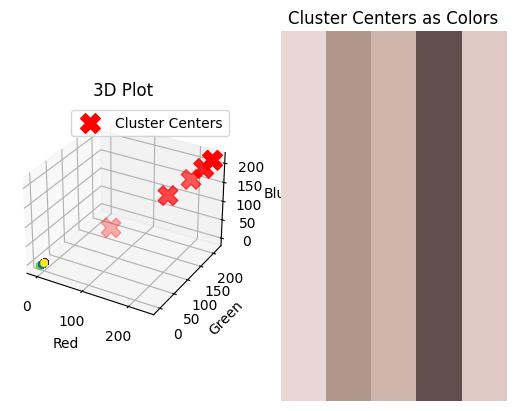

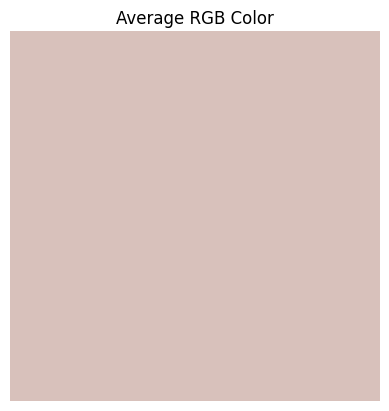

In [6]:
# 가중평균계산 기존.ver
from collections import Counter

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_k = 5
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 중심값(RGB 형식) 출력
cluster_centers_rgb = scaler.inverse_transform(optimal_kmeans.cluster_centers_)

for i, center in enumerate(cluster_centers_rgb):
    print(f'Cluster {i + 1} Center (RGB): {center}')

# 각 클러스터에 속하는 픽셀 수 계산
cluster_sizes = Counter(optimal_cluster_labels)

for i, size in cluster_sizes.items():
    print(f'Cluster {i + 1} Size: {size} pixels')

total_pixels = sum(cluster_sizes.values())

# 출력 전체 픽셀 수
print(f'전체 픽셀 수: {total_pixels}')

# 각 클러스터에 속하는 픽셀 수와 중심값(RGB)의 가중 평균 계산
weighted_sum = np.zeros(3)  # 초기화: R, G, B의 가중 합
for i in range(optimal_k):
    cluster_size = cluster_sizes[i]
    cluster_center_rgb = cluster_centers_rgb[i]
    weighted_sum += cluster_center_rgb * cluster_size

# 평균 RGB 계산
average_rgb = weighted_sum / total_pixels

# 출력
print(f'평균 RGB 값: {average_rgb}')

# 평균 RGB 값을 사용하여 이미지 생성
average_rgb_image = np.full((100, 100, 3), average_rgb, dtype=np.uint8)


# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()

# 3D 플로팅
ax = fig.add_subplot(121, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.scatter(cluster_centers_rgb[:, 0], cluster_centers_rgb[:, 1], cluster_centers_rgb[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
ax.set_title('3D Plot')

# 색상으로 표현
cluster_centers_image = cluster_centers_rgb.reshape((1, optimal_k, 3))
cluster_centers_image = cluster_centers_image.astype(np.uint8)
ax2 = fig.add_subplot(122)
ax2.imshow(cluster_centers_image, aspect='auto')
ax2.axis('off')
ax2.set_title('Cluster Centers as Colors')

plt.show()

# 이미지 표시
plt.imshow(average_rgb_image)
plt.axis('off')
plt.title('Average RGB Color')
plt.show()

# color distance
# z-score
# 정규화


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Center (RGB): [234.86050791 214.36853147 211.40228193]
Cluster 2 Center (RGB): [177.79460483 150.56239154 140.97397066]
Cluster 3 Center (RGB): [207.87939538 182.93082688 172.59815538]
Cluster 4 Center (RGB): [98.44396887 78.60622568 76.05914397]
Cluster 5 Center (RGB): [224.03801899 201.13867879 194.91181204]
Cluster 1 Size: 27170 pixels
Cluster 5 Size: 24858 pixels
Cluster 3 Size: 15615 pixels
Cluster 2 Size: 6340 pixels
Cluster 4 Size: 2565 pixels
전체 픽셀 수: 76548


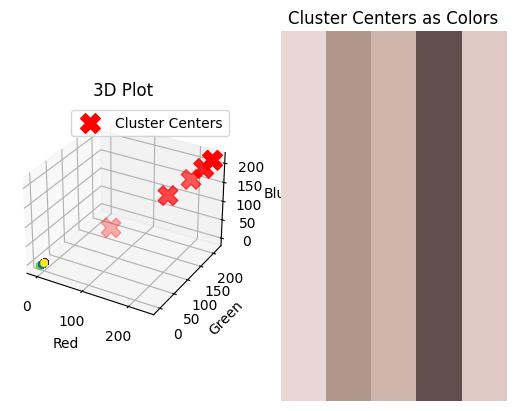

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.preprocessing import StandardScaler
import imageio


#  이미지 로드
image_path = "/content/facemesh.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = face_image[~np.all(face_image == [0, 0, 0], axis=-1)]

# 이미지를 2D 배열로 변환
face_data = non_black_pixels.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)



from collections import Counter

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_k = 5
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 중심값(RGB 형식) 출력
cluster_centers_rgb = scaler.inverse_transform(optimal_kmeans.cluster_centers_)

for i, center in enumerate(cluster_centers_rgb):
    print(f'Cluster {i + 1} Center (RGB): {center}')

# 각 클러스터에 속하는 픽셀 수 계산
cluster_sizes = Counter(optimal_cluster_labels)

for i, size in cluster_sizes.items():
    print(f'Cluster {i + 1} Size: {size} pixels')

total_pixels = sum(cluster_sizes.values())

# 출력 전체 픽셀 수
print(f'전체 픽셀 수: {total_pixels}')


# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()

# 3D 플로팅
ax = fig.add_subplot(121, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.scatter(cluster_centers_rgb[:, 0], cluster_centers_rgb[:, 1], cluster_centers_rgb[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
ax.set_title('3D Plot')

# 색상으로 표현
cluster_centers_image = cluster_centers_rgb.reshape((1, optimal_k, 3))
cluster_centers_image = cluster_centers_image.astype(np.uint8)
ax2 = fig.add_subplot(122)
ax2.imshow(cluster_centers_image, aspect='auto')
ax2.axis('off')
ax2.set_title('Cluster Centers as Colors')

plt.show()


# color distance
# z-score
# 정규화
